# AB Test

* Definir Objetivo

El objetivo de la realización de este test es comprobar la eficacia de los cambios para aumentar el número de ventas

* Formular hipótesis

$H_0$: Los cambios realizados no aumentan las ventas.

$H_1$: Los cambios realizados generan un aumento significativo de las ventas.

* Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms
from src import soporte_abtesting as sa

In [5]:
import math

* Calcular tamaño muestral

In [28]:
diferencia = sms.proportion_effectsize(0.81, 1)   

tamaño_muestral = sms.NormalIndPower().solve_power(
    diferencia,  # el tamaño del efecto calculado en el paso anterior
    power=0.8, # la potencia estadística deseada, que recordemos se suele establecer en 0.8
    alpha=0.05, # nivel de significancia deseado, que normalmente se establece en 0.05
    ratio=1 # La relación entre el tamaño de muestra del grupo experimental y el tamaño de muestra del grupo de control. En este caso, se establece en 1, lo que significa que ambos grupos tendrán el mismo tamaño de muestra.
    )                                              
                       
print(f'El tamaño muestral debe de ser de: {math.ceil(tamaño_muestral)}')

El tamaño muestral debe de ser de: 20


* Cargar datasets

In [29]:
grupo_control = pd.read_csv("datasets/control_group.csv", sep = ";")
grupo_test = pd.read_csv("datasets/test_group.csv", sep = ";")

* Unir datasets

In [30]:
ab_test = pd.concat([grupo_control, grupo_test], axis=0).reset_index(drop = True)

* Explorar datasets

In [35]:
sa.exploracion_dataframe(ab_test, "Campaign Name")

El número de datos es 60 y el de columnas es 10

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
# of Impressions,1.666667
Reach,1.666667
# of Website Clicks,1.666667
# of Searches,1.666667
# of View Content,1.666667
# of Add to Cart,1.666667
# of Purchase,1.666667



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Campaign Name,object
Date,object
Spend [USD],int64
# of Impressions,float64
Reach,float64
# of Website Clicks,float64
# of Searches,float64
# of View Content,float64
# of Add to Cart,float64
# of Purchase,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna CAMPAIGN NAME tiene las siguientes valore únicos:


,count
Campaign Name,
Control Campaign,30
Test Campaign,30


La columna DATE tiene las siguientes valore únicos:


,count
Date,
1.08.2019,2
2.08.2019,2
3.08.2019,2
4.08.2019,2
5.08.2019,2



 ..................... 

Los principales estadísticos de las columnas categóricas para el CONTROL CAMPAIGN son: 


,count,unique,top,freq
Campaign Name,30,1,Control Campaign,30
Date,30,30,1.08.2019,1



 ..................... 

Los principales estadísticos de las columnas numéricas para el CONTROL CAMPAIGN son: 


,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
# of Impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
# of Website Clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
# of Searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
# of View Content,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
# of Add to Cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
# of Purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el TEST CAMPAIGN son: 


,count,unique,top,freq
Campaign Name,30,1,Test Campaign,30
Date,30,30,1.08.2019,1



 ..................... 

Los principales estadísticos de las columnas numéricas para el TEST CAMPAIGN son: 


,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
# of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
# of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
# of Searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
# of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
# of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
# of Purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


* Dado que existen nulos vamos a tratarlos y rellenarlos con la media

In [36]:
ab_test[['# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']] = ab_test[['# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']].mean()

C:\Users\pepel\AppData\Local\Temp\ipykernel_2364\2584583693.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ab_test[['# of Impressions', 'Reach',


* Cambiamos el tipo de dato de la columna Date a fecha

In [55]:
ab_test["Date"] = pd.to_datetime(ab_test["Date"], errors="coerce")

* Comprobamos que ya no hay nulos

In [37]:
ab_test.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

* Calculamos el ratio de conversión

,mean,std
Campaign Name,,
Control Campaign,2288.4333,367.3345
Test Campaign,2563.0667,348.6877


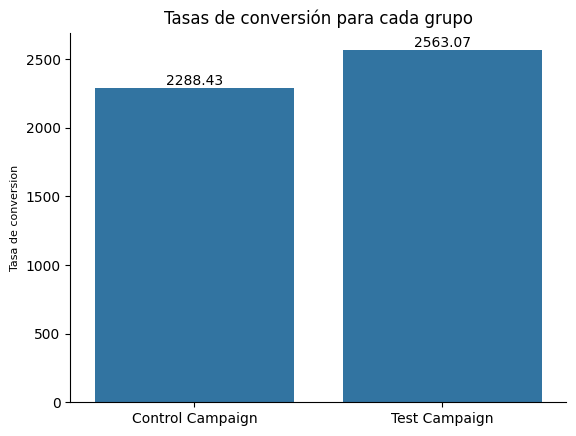

In [50]:
ratio_conversion = ab_test.groupby('Campaign Name')['Spend [USD]'].agg(["mean", "std"]).round(4)
display(ratio_conversion)

fig = sns.barplot(ratio_conversion, 
                  x = ratio_conversion.index, 
                  y = "mean") 

# ponemos las etiquetas en cada una de las barras
fig.bar_label(fig.containers[0], fontsize=10)

# eliminar los ejes de arriba y la derecha
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

# ponemos título a la gráfica
fig.set_title("Tasas de conversión para cada grupo")

# cambiamos el nombre del eje y
fig.set_ylabel("Tasa de conversion", fontsize = 8)

# quitamos el nombre del eje x
fig.set_xlabel("");

Dados los resultados, podemos decir que el test supera a los resultados originales en media, lo que sugiere que el cambio podría haber mejorado el rendimiento.

Aunque hay dispersión en ambos grupos, los valores no son extremadamente diferentes lo que sugiere que los resultados son consistentes y no hay valores atípicos.

En conclusión se puede decir que el grupo de test tiene un rendimiento superior al de control ya que tiene una media más alta y la variabilidad es similar.

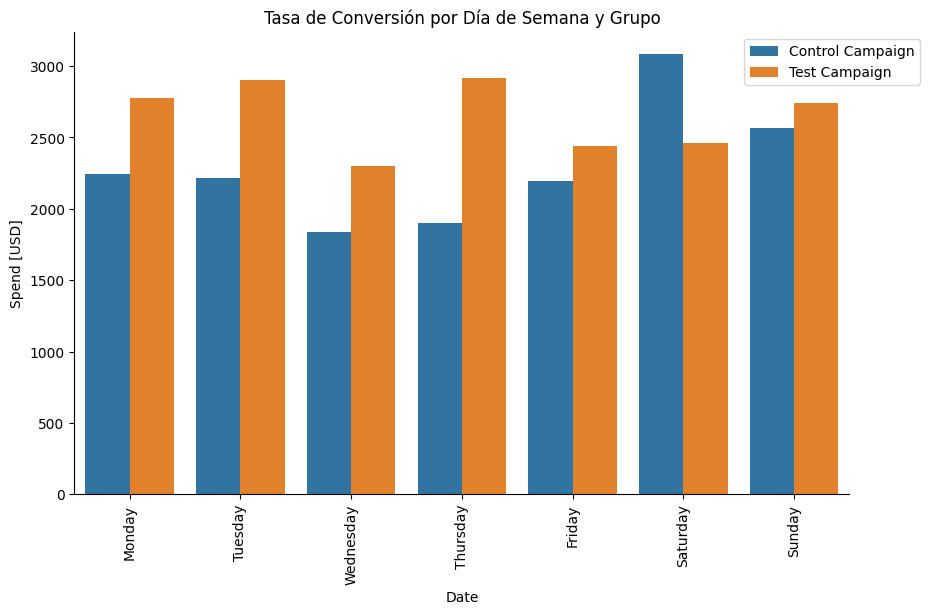

In [57]:
# vamos a analizar ahora si la tasa de conversión varía a lo largo de la semana, para eso lo primero que vamos a hacer es un groupby
df_groupby = ab_test.groupby(["Campaign Name", ab_test["Date"].dt.day_name()])["Spend [USD]"].mean().reset_index()

# establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# creamos una lista para establecer el orden de las barras de la semana
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# creamos un barplot
fig3 = sns.barplot(data=df_groupby, 
                   x='Date', 
                   y='Spend [USD]', 
                   hue='Campaign Name', 
                   order=days_order) # establecemos el orden de las barras )

# cambiamos la posición de la leyenda
fig3.legend(loc = 'upper right', # especificamos la ubicación de la leyenda
            bbox_to_anchor=(1.1, 1)) # especificamos las coordenadas de la leyenda 

# cambiamos la rotación de las etiquetas de los ejes
fig3.set_xticks(ticks = range(len(days_order)), # las posiciones de las etiquetas
                labels = days_order, # el nombre de las etiquetas
                rotation = 90) # que rotamos las etiquetas 90º

# eliminamos los ejes de arriba y la derecha
fig3.spines['top'].set_visible(False)
fig3.spines['right'].set_visible(False)

# ponemos título a la gráfica
fig3.set_title("Tasa de Conversión por Día de Semana y Grupo");

Si analizamos la tasa de conversión por días podemos observar que los datos son muy parecidos en todos los días teniendo como excepción el sábado ya que es el único día que el grupo de control es superior al test.

* AB Testing

Para confirmar lo visto en los cálculos y gráficas anteriores vamos a realizar un t-test ya que tenemos dos grupos independientes en el cual queremos valorar el cambio en el nº de ventas tras aplicar un cambio

In [58]:
data_t = {'Campaign Name': ['Control Campaign'] * 25 + ['Test Campaign'] * 25,
        'CTR': np.concatenate([np.random.normal(0.02, 0.01, 25),
                               np.random.normal(0.025, 0.01, 25)])}

df_t = pd.DataFrame(data_t)
df_t.head()

,Campaign Name,CTR
0,Control Campaign,0.011531
1,Control Campaign,0.026422
2,Control Campaign,0.025025
3,Control Campaign,0.026038
4,Control Campaign,0.013482


<Axes: xlabel='Campaign Name', ylabel='CTR'>

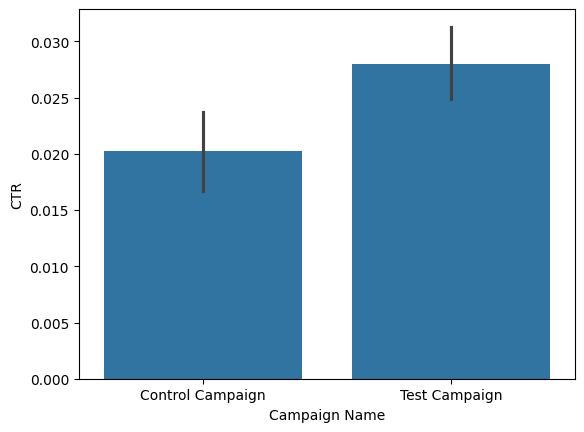

In [60]:
sns.barplot(x="Campaign Name", y="CTR", data=df_t)

In [61]:
ab_testing = sa.Pruebas_parametricas("Campaign Name",  "CTR", df_t)
ab_testing.test_t()

Estadístico t: -3.0823668114603198
Valor p: 0.003398036894447293
El p-valor de la prueba es 0.0034, por lo tanto, hay diferencias significativas entre los grupos.


Dados los resultados del test podemos decir que los cambios realizados tienen un impacto significativo en las ventas.
Con un valor p de 0.0034, al ser < 0 05, rechazamos la hipótesis nula (H₀). 
Como resultado de los test realizaos, se podría considerar aplicar los cambios de forma definitiva.